Import Libraries

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/heart_attack_prediction_dataset.csv")
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Data Preprocessing/ Exploratory Data Analysis

In [ ]:
# Check for null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
# number of males vs females
count = data["Sex"].value_counts()
count

Sex
0    6111
1    2652
Name: count, dtype: int64

Text(0.5, 1.0, 'Male vs Female')

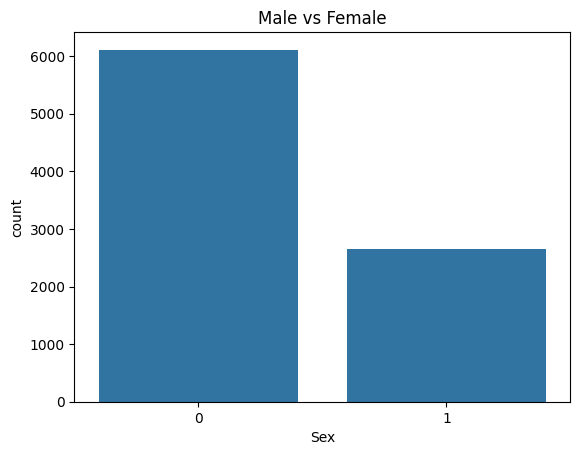

In [ ]:
# Create a Sex column count plot
sns.countplot(x="Sex", data=data)
plt.title("Male vs Female")

In [ ]:
# Sex count percentage
Male = len(data[data['Sex']==0])
Female = len(data[data['Sex']==1])

Male_count = Male / (Male + Female)
Female_count = Female / (Male + Female)

print('Percentage of Male:', Male_count * 100)
print('Percentage of Female:', Female_count * 100)

Percentage of Male: 69.73639164669633
Percentage of Female: 30.26360835330366


In [ ]:
# Drop colums
data = data.drop(columns = ["Country", "Continent", "Hemisphere"])

In [ ]:
# Encode the sex and diet column
data["Sex"] = data["Sex"].replace("Male", 0)
data["Sex"] = data["Sex"].replace("Female", 1)

data["Diet"] = data["Diet"].replace("Unhealthy", 0)
data["Diet"] = data["Diet"].replace("Healthy", 1)
data["Diet"] = data["Diet"].replace("Average", 2)

In [ ]:
# Split "Blood Pressure" column and create new columns
data["Blood Pressure"]

a = np.zeros(len(data))
b = np.zeros(len(data))

for (i,v) in enumerate(data["Blood Pressure"]):
    a[i] = int(v.split("/")[0])
    b[i] = int(v.split("/")[1])

data.insert(0, "Pressure2", a)
data.insert(0, "Pressure1", b)

In [ ]:
# Summary Statistics
data.describe()

,Pressure1,Pressure2,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,85.156111,135.075659,53.707977,0.302636,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,...,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,14.676565,26.349976,21.249509,0.459425,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,...,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,60.000000,90.000000,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,72.000000,112.000000,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,85.000000,135.000000,54.000000,0.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,98.000000,158.000000,72.000000,1.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,110.000000,180.000000,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
data.columns

Index(['Pressure1', 'Pressure2', 'Patient ID', 'Age', 'Sex', 'Cholesterol',
       'Blood Pressure', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking',
       'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day',
       'Heart Attack Risk'],
      dtype='object')

In [ ]:
# Define the target and features

target = ['Heart Attack Risk']

features = ['Pressure2', 'Pressure1','Age','Sex', 'Cholesterol', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day']

X = data[features]
y = data[target]

In [ ]:
# Split dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(7010, 22)
(7010, 1)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(1753, 22)
(1753, 1)


Model Definition

Random Forest Classifier

In [ ]:
# Define the RandomForestClassifier
rfc = RandomForestClassifier(random_state=52)
rfc.fit(X_train, y_train)

<ipython-input-72-e3352331667f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=52)

In [ ]:
# Get best hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Perform grid search
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get best parameters and evaluate
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
# Prediction
pred = best_rf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluate the model
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.78      1112
           1       0.00      0.00      0.00       641

    accuracy                           0.63      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.40      0.63      0.49      1753



[[1110    2]
 [ 641    0]]


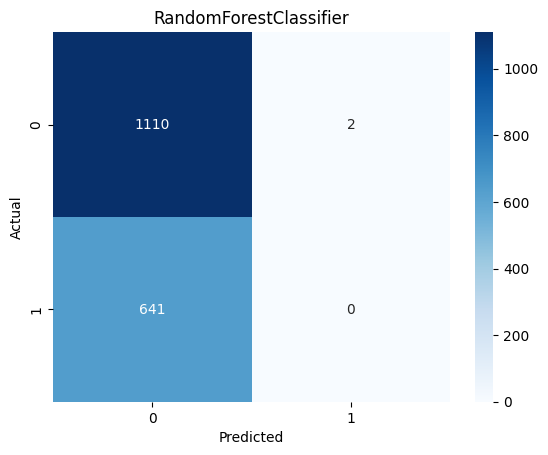

In [ ]:
# Confusion matrix
conf = confusion_matrix(y_test,pred)
print(conf)

# Create heatmap
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RandomForestClassifier")
plt.show()

Decision Tree Classifier

In [ ]:
# Define the DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions
prediction = dtree.predict(X_test)
prediction

array([1, 1, 0, ..., 0, 1, 0])

In [ ]:
# Evaluate the model
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      1112
           1       0.40      0.43      0.41       641

    accuracy                           0.55      1753
   macro avg       0.53      0.53      0.53      1753
weighted avg       0.56      0.55      0.56      1753



[[690 422]
 [363 278]]


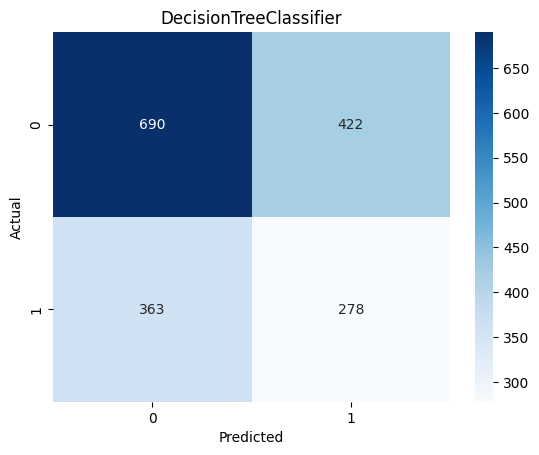

In [ ]:
# Confusion matrix
conf = confusion_matrix(y_test,prediction)
print(conf)

# Create heatmap
sns.heatmap(conf, annot=True, fmt="d", cmap="Blues")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("DecisionTreeClassifier")
plt.show()